Steps to be followed
1.Load the dataset
2.Data processing
3.Do the data visualization on every column scatterplot and box plots for numerical variables 
4.Converting the categorical variables to labels
5.Going with the heatmaps
5.Checking for the Multicollinearity with VIF
5.Using statsmodels create a multiple linear regression model
6.Train and test split the dataset 
7.Evaluate metrics

In [3]:
import pandas as pd
df = pd.read_csv('C:/Users/sande/Desktop/Bike Sharing Case Study/day.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [8]:
df['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [9]:
df.drop(['casual', 'registered','instant','dteday'], axis=1, inplace=True)
df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


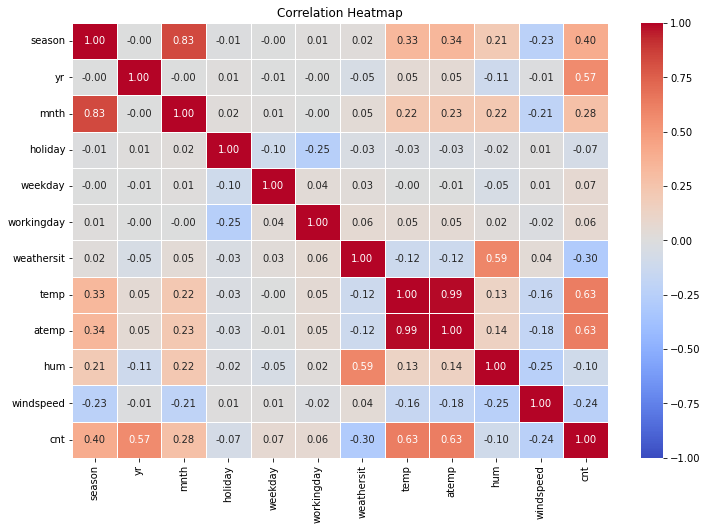

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named df
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

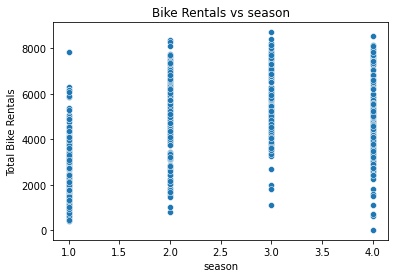

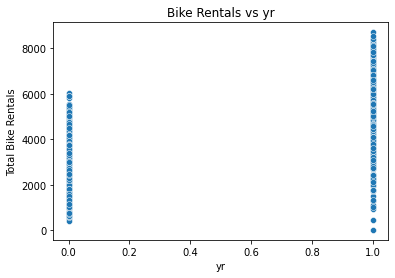

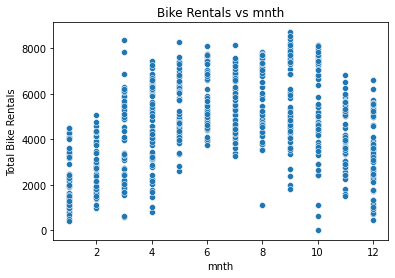

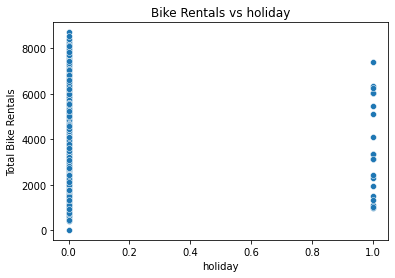

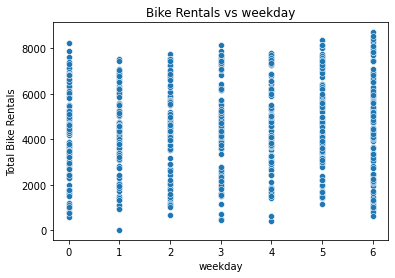

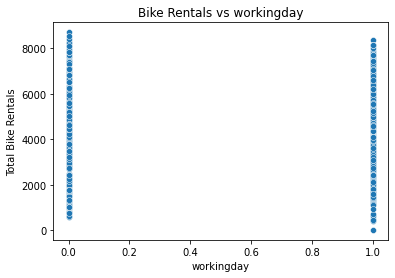

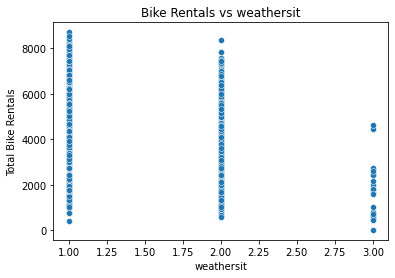

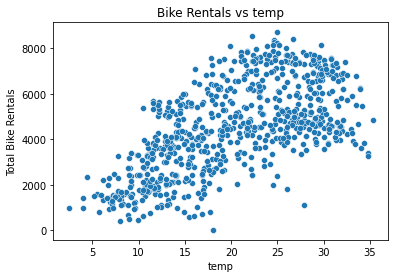

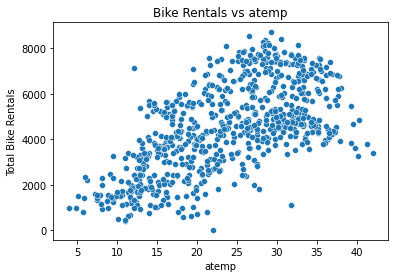

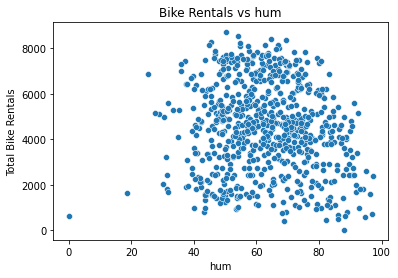

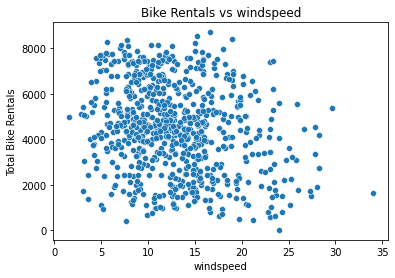

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns (excluding 'cnt')
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('cnt')  # Remove the target variable

# Create scatter plots for all numerical variables
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=column, y='cnt', data=df)
    plt.title(f"Bike Rentals vs {column}")
    plt.xlabel(column)
    plt.ylabel("Total Bike Rentals")
    plt.show()

In [12]:
df['season_label'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df['weathersit_label'] = df['weathersit'].map({1: 'Clear', 2: 'Cloudy', 3: 'Light Rain', 4: 'Heavy Rain'})

# Drop the original numeric columns
df.drop(['season', 'weathersit'], axis=1, inplace=True)

# Display the updated dataframe
print(df.head())

   yr  mnth  holiday  weekday  workingday       temp     atemp      hum  \
0   0     1        0        6           0  14.110847  18.18125  80.5833   
1   0     1        0        0           0  14.902598  17.68695  69.6087   
2   0     1        0        1           1   8.050924   9.47025  43.7273   
3   0     1        0        2           1   8.200000  10.60610  59.0435   
4   0     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed   cnt season_label weathersit_label  
0  10.749882   985       Spring           Cloudy  
1  16.652113   801       Spring           Cloudy  
2  16.636703  1349       Spring            Clear  
3  10.739832  1562       Spring            Clear  
4  12.522300  1600       Spring            Clear  


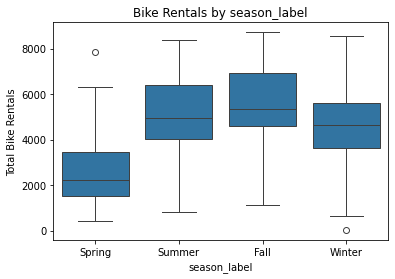

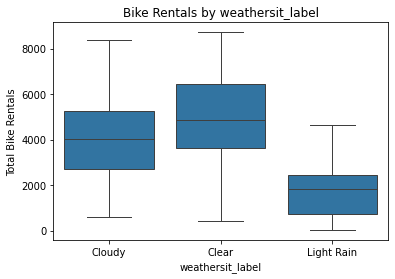

In [13]:
# List of categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Create box plots for all categorical variables
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=column, y='cnt', data=df)
    plt.title(f"Bike Rentals by {column}")
    plt.xlabel(column)
    plt.ylabel("Total Bike Rentals")
    plt.show()

In [14]:
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_label,weathersit_label
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,Spring,Cloudy
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,Spring,Cloudy
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,Spring,Clear
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,Spring,Clear
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,Spring,Clear


In [15]:
# Count the occurrences of each unique value in 'season_label'
season_counts = df['season_label'].value_counts()

# Display the result
print(season_counts)


season_label
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64


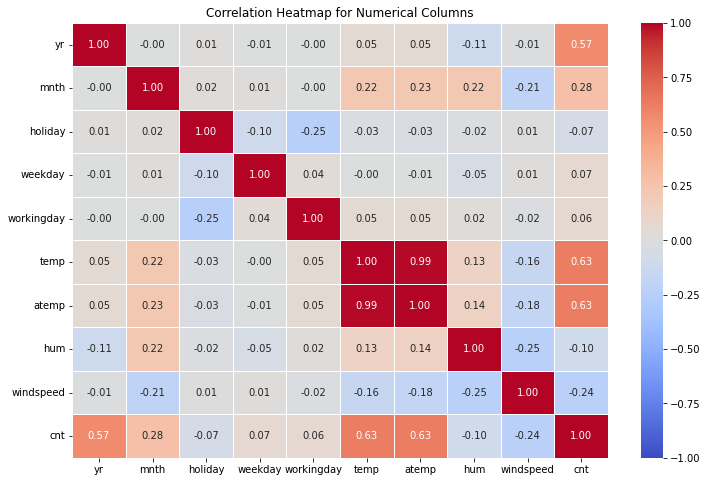

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named df
# Select only the numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
corr_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap for Numerical Columns")

# Display the plot
plt.show()


In [17]:
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_label,weathersit_label
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,Spring,Cloudy
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,Spring,Cloudy
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,Spring,Clear
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,Spring,Clear
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,Spring,Clear


In [18]:
# Convert all Boolean columns (True/False) to 1/0
df = df.astype({col: int for col in df.select_dtypes(include=['bool']).columns})

# Display the first few rows to verify
print(df.head())

   yr  mnth  holiday  weekday  workingday       temp     atemp      hum  \
0   0     1        0        6           0  14.110847  18.18125  80.5833   
1   0     1        0        0           0  14.902598  17.68695  69.6087   
2   0     1        0        1           1   8.050924   9.47025  43.7273   
3   0     1        0        2           1   8.200000  10.60610  59.0435   
4   0     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed   cnt season_label weathersit_label  
0  10.749882   985       Spring           Cloudy  
1  16.652113   801       Spring           Cloudy  
2  16.636703  1349       Spring            Clear  
3  10.739832  1562       Spring            Clear  
4  12.522300  1600       Spring            Clear  


In [19]:
# df.drop(['weekday'], axis=1, inplace=True)
# df.head()

In [20]:
import pandas as pd

# Create dummy variables for 'season_label' and 'weathersit_label'
df = pd.get_dummies(df, columns=['season_label', 'weathersit_label'], drop_first=True)

# Ensure dummy columns are numeric (convert True/False to 1/0 if needed)
df= df.astype(int)

# Display the first few rows
print(df.head())


   yr  mnth  holiday  weekday  workingday  temp  atemp  hum  windspeed   cnt  \
0   0     1        0        6           0    14     18   80         10   985   
1   0     1        0        0           0    14     17   69         16   801   
2   0     1        0        1           1     8      9   43         16  1349   
3   0     1        0        2           1     8     10   59         10  1562   
4   0     1        0        3           1     9     11   43         12  1600   

   season_label_Spring  season_label_Summer  season_label_Winter  \
0                    1                    0                    0   
1                    1                    0                    0   
2                    1                    0                    0   
3                    1                    0                    0   
4                    1                    0                    0   

   weathersit_label_Cloudy  weathersit_label_Light Rain  
0                        1                          

In [21]:
import sklearn
from sklearn.model_selection import train_test_split

df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)


In [22]:
print(df_train.shape)
print(df_test.shape)

(510, 15)
(220, 15)


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   yr                           510 non-null    int32
 1   mnth                         510 non-null    int32
 2   holiday                      510 non-null    int32
 3   weekday                      510 non-null    int32
 4   workingday                   510 non-null    int32
 5   temp                         510 non-null    int32
 6   atemp                        510 non-null    int32
 7   hum                          510 non-null    int32
 8   windspeed                    510 non-null    int32
 9   cnt                          510 non-null    int32
 10  season_label_Spring          510 non-null    int32
 11  season_label_Summer          510 non-null    int32
 12  season_label_Winter          510 non-null    int32
 13  weathersit_label_Cloudy      510 non-null    int32
 1

MIN MAX scaling between 0 and 1

In [24]:
#normalization
#(x-xmin)/xmax-xmin
from sklearn.preprocessing import MinMaxScaler
#1.isntantiate an object
#2.fit on the data

#create a list of numeric vars

scaler=MinMaxScaler()

num_vars=['temp','atemp','hum','windspeed','cnt']

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

df_train.head()



,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_label_Spring,season_label_Summer,season_label_Winter,weathersit_label_Cloudy,weathersit_label_Light Rain
576,1,7,0,2,1,0.818182,0.769231,0.721649,0.28125,0.827658,0,0,0,0,0
426,1,3,0,6,0,0.424242,0.435897,0.639175,0.25000,0.465255,1,0,0,1,0
728,1,12,0,0,0,0.242424,0.205128,0.494845,0.65625,0.204096,1,0,0,0,0
482,1,4,0,6,0,0.393939,0.384615,0.494845,0.18750,0.482973,0,1,0,1,0
111,0,4,0,5,1,0.333333,0.333333,0.742268,0.37500,0.191095,0,1,0,1,0


In [25]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.533571,0.512217,0.645826,0.322917,0.513499
std,0.225145,0.207737,0.145867,0.165495,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.333333,0.536082,0.218750,0.356420
50%,0.545455,0.538462,0.649485,0.312500,0.518638
75%,0.727273,0.692308,0.752577,0.406250,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


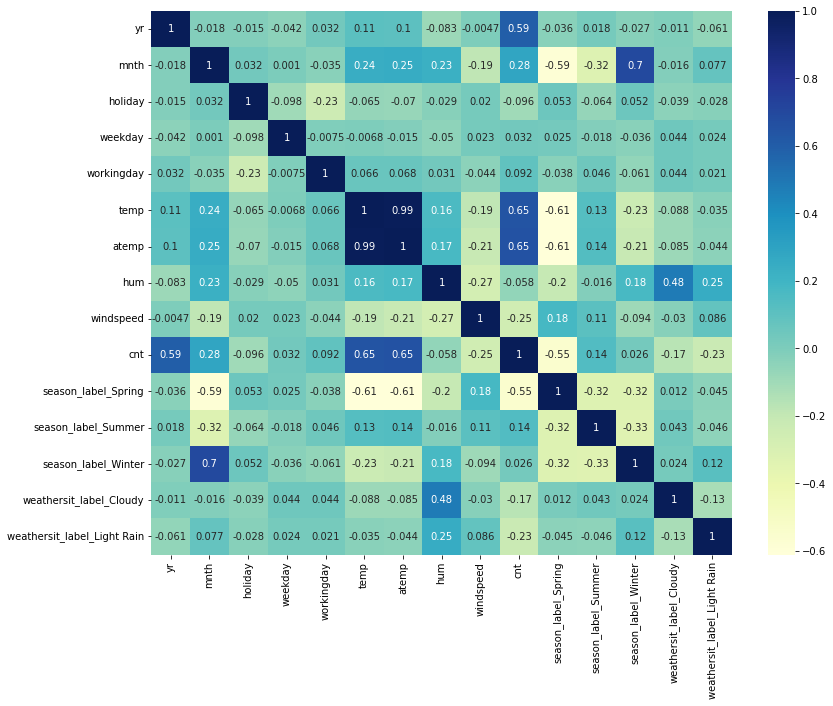

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(13,10))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [27]:
y_train=df_train.pop('cnt')
X_train=df_train

In [28]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,season_label_Spring,season_label_Summer,season_label_Winter,weathersit_label_Cloudy,weathersit_label_Light Rain
576,1,7,0,2,1,0.818182,0.769231,0.721649,0.28125,0,0,0,0,0
426,1,3,0,6,0,0.424242,0.435897,0.639175,0.25000,1,0,0,1,0
728,1,12,0,0,0,0.242424,0.205128,0.494845,0.65625,1,0,0,0,0
482,1,4,0,6,0,0.393939,0.384615,0.494845,0.18750,0,1,0,1,0
111,0,4,0,5,1,0.333333,0.333333,0.742268,0.37500,0,1,0,1,0


In [29]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [30]:
#add a constant 
import statsmodels.api as sm

In [31]:
# X_train_sm = sm.add_constant(X_train['temp'])

# #create our first model 
# lr=sm.OLS(y_train, X_train_sm)
# lr_model=lr.fit()

In [32]:
# lr_model.params

In [33]:
# lr_model.summary()

In [34]:
# X_train_sm=X_train[['temp','yr']]
# X_train_sm=sm.add_constant(X_train_sm)

# lr=sm.OLS(y_train,X_train_sm)
# lr_model=lr.fit()

# lr_model.summary()

ADDING ALL THE VARIABLES TO MODEL

In [35]:
df.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'season_label_Spring', 'season_label_Summer',
       'season_label_Winter', 'weathersit_label_Cloudy',
       'weathersit_label_Light Rain'],
      dtype='object')

In [36]:
#build a model with all the variables
x_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,x_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.88e-182
Time:                        19:56:48   Log-Likelihood:                 495.29
No. Observations:                 510   AIC:                            -960.6
Df Residuals:                     495   BIC:                            -897.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2418      0.040      6.110      0.000       0.164       0.320
yr                              0.2318      0.008     27.613      0.000       0.215       0.248
mnth                            0.0014      0.002      0.611      0.542      -0.003       0.006
holiday                        -0.0632      0.027     -2.326      0.020      -0.117      -0.010
weekday                         0.0082      0.002      3.932      0.000       0.004       0.012
workingday                      0.0190      0.009      2.090      0.037       0.001       0.037
temp                            0.3783      0.131      2.895      0.004       0.122       0.635
atemp                           0.1210      0.136      0.888      0.375      -0.147       0.389
hum                            -0.1293      0.039     -3.311      0.001      -0.206      -0.053
windspeed                      -0.1790      0.028     -6.465      0.000      -0.233      -0.125
season_label_Spring            -0.0725      0.023     -3.157      0.002      -0.118      -0.027
season_label_Summer             0.0452      0.016      2.908      0.004       0.015       0.076
season_label_Winter             0.0798      0.019      4.302      0.000       0.043       0.116
weathersit_label_Cloudy        -0.0568      0.011     -5.217      0.000      -0.078      -0.035
weathersit_label_Light Rain    -0.2467      0.027     -9.022      0.000      -0.300      -0.193
==============================================================================
Omnibus:                       75.166   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.765
Skew:                          -0.749   Prob(JB):                     6.21e-42
Kurtosis:                       5.586   Cond. No.                         367.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Month and atemp needs to be removed caused it has more p value 

Algorithm
we could drop variable based on significance


VIF how collinear is the variable with all other variables

we can use both of the above to decide which infirmation to drop 

below provided the code for vif

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,temp,335.28
6,atemp,333.19
7,hum,30.51
1,mnth,15.41
8,windspeed,5.18
11,season_label_Winter,4.67
9,season_label_Spring,4.37
4,workingday,3.20
3,weekday,3.17
10,season_label_Summer,2.66


FROM the above VIF we can conside that the temp and atemp are having the high multicollinearity so we'll remove atemp from the columns

In [38]:
# First drop atemp from X_train
X_train = X_train.drop(['atemp'], axis=1)

# Then continue with your existing code
x_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.9
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          5.14e-183
Time:                        19:56:49   Log-Likelihood:                 494.88
No. Observations:                 510   AIC:                            -961.8
Df Residuals:                     496   BIC:                            -902.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2437      0.040      6.169      0.000       0.166       0.321
yr                              0.2316      0.008     27.605      0.000       0.215       0.248
mnth                            0.0014      0.002      0.605      0.545      -0.003       0.006
holiday                        -0.0642      0.027     -2.366      0.018      -0.118      -0.011
weekday                         0.0081      0.002      3.897      0.000       0.004       0.012
workingday                      0.0191      0.009      2.096      0.037       0.001       0.037
temp                            0.4904      0.034     14.340      0.000       0.423       0.558
hum                            -0.1280      0.039     -3.280      0.001      -0.205      -0.051
windspeed                      -0.1834      0.027     -6.733      0.000      -0.237      -0.130
season_label_Spring            -0.0709      0.023     -3.096      0.002      -0.116      -0.026
season_label_Summer             0.0472      0.015      3.068      0.002       0.017       0.077
season_label_Winter             0.0821      0.018      4.476      0.000       0.046       0.118
weathersit_label_Cloudy        -0.0571      0.011     -5.248      0.000      -0.078      -0.036
weathersit_label_Light Rain    -0.2484      0.027     -9.109      0.000      -0.302      -0.195
==============================================================================
Omnibus:                       72.544   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.831
Skew:                          -0.723   Prob(JB):                     1.21e-40
Kurtosis:                       5.562   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
6,hum,30.35
5,temp,16.99
1,mnth,15.40
7,windspeed,5.03
10,season_label_Winter,4.55
8,season_label_Spring,4.27
4,workingday,3.20
3,weekday,3.17
9,season_label_Summer,2.56
11,weathersit_label_Cloudy,2.32


Here we can see mnth has the higher p value which means no significant impact and high VIF indicating that redudndancy with other predictiors

In [40]:
# First drop atemp from X_train
X_train = X_train.drop(['mnth'], axis=1)

# Then continue with your existing code
x_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.0
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.20e-184
Time:                        19:56:49   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     497   BIC:                            -908.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2524      0.037      6.873      0.000       0.180       0.325
yr                              0.2314      0.008     27.619      0.000       0.215       0.248
holiday                        -0.0636      0.027     -2.347      0.019      -0.117      -0.010
weekday                         0.0082      0.002      3.941      0.000       0.004       0.012
workingday                      0.0190      0.009      2.085      0.038       0.001       0.037
temp                            0.4912      0.034     14.389      0.000       0.424       0.558
hum                            -0.1257      0.039     -3.239      0.001      -0.202      -0.049
windspeed                      -0.1829      0.027     -6.723      0.000      -0.236      -0.129
season_label_Spring            -0.0771      0.020     -3.785      0.000      -0.117      -0.037
season_label_Summer             0.0429      0.014      3.139      0.002       0.016       0.070
season_label_Winter             0.0867      0.017      5.183      0.000       0.054       0.120
weathersit_label_Cloudy        -0.0575      0.011     -5.294      0.000      -0.079      -0.036
weathersit_label_Light Rain    -0.2493      0.027     -9.165      0.000      -0.303      -0.196
==============================================================================
Omnibus:                       72.871   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.613
Skew:                          -0.724   Prob(JB):                     4.95e-41
Kurtosis:                       5.576   Cond. No.                         48.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,hum,27.01
4,temp,15.56
6,windspeed,4.87
7,season_label_Spring,3.87
3,workingday,3.19
2,weekday,3.10
9,season_label_Winter,3.08
10,weathersit_label_Cloudy,2.28
8,season_label_Summer,2.27
0,yr,2.08


Now currently Humidity has the Highest VIF(26.95)
temp has VIF of 15.04
Both are significant(p<0.05) so we need to handle this carefully


In [42]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# X_train[['temp','hum']]=scaler.fit_transform(X_train[['temp','hum']])

In [43]:

x_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.0
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.20e-184
Time:                        19:56:49   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     497   BIC:                            -908.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2524      0.037      6.873      0.000       0.180       0.325
yr                              0.2314      0.008     27.619      0.000       0.215       0.248
holiday                        -0.0636      0.027     -2.347      0.019      -0.117      -0.010
weekday                         0.0082      0.002      3.941      0.000       0.004       0.012
workingday                      0.0190      0.009      2.085      0.038       0.001       0.037
temp                            0.4912      0.034     14.389      0.000       0.424       0.558
hum                            -0.1257      0.039     -3.239      0.001      -0.202      -0.049
windspeed                      -0.1829      0.027     -6.723      0.000      -0.236      -0.129
season_label_Spring            -0.0771      0.020     -3.785      0.000      -0.117      -0.037
season_label_Summer             0.0429      0.014      3.139      0.002       0.016       0.070
season_label_Winter             0.0867      0.017      5.183      0.000       0.054       0.120
weathersit_label_Cloudy        -0.0575      0.011     -5.294      0.000      -0.079      -0.036
weathersit_label_Light Rain    -0.2493      0.027     -9.165      0.000      -0.303      -0.196
==============================================================================
Omnibus:                       72.871   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.613
Skew:                          -0.724   Prob(JB):                     4.95e-41
Kurtosis:                       5.576   Cond. No.                         48.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,hum,27.01
4,temp,15.56
6,windspeed,4.87
7,season_label_Spring,3.87
3,workingday,3.19
2,weekday,3.10
9,season_label_Winter,3.08
10,weathersit_label_Cloudy,2.28
8,season_label_Summer,2.27
0,yr,2.08


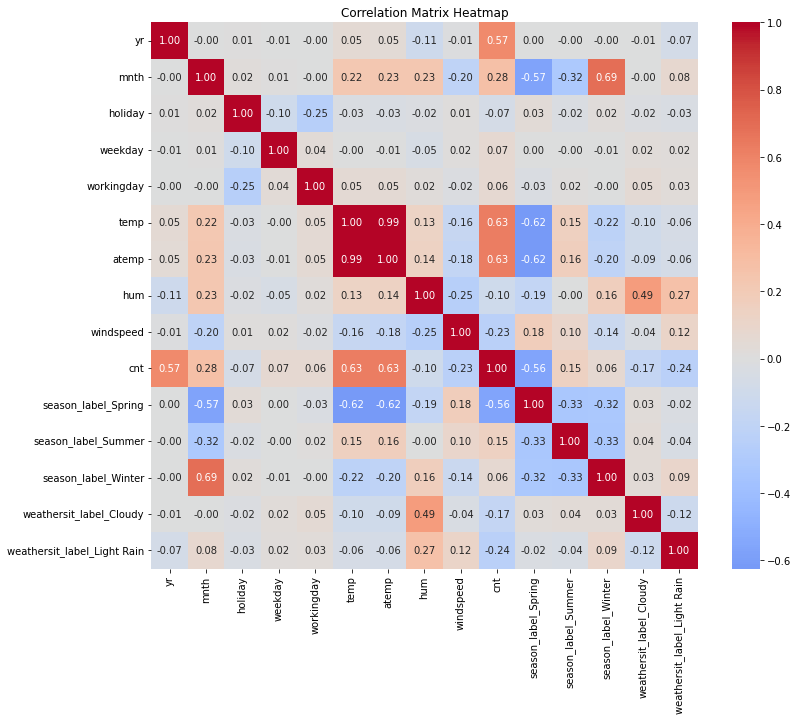


Correlations with Humidity:
hum                            1.000000
weathersit_label_Cloudy        0.490045
weathersit_label_Light Rain    0.268484
mnth                           0.226726
season_label_Winter            0.164992
atemp                          0.142488
temp                           0.129839
workingday                     0.022733
season_label_Summer           -0.004477
holiday                       -0.015599
weekday                       -0.052484
cnt                           -0.098060
yr                            -0.112018
season_label_Spring           -0.185930
windspeed                     -0.252148
Name: hum, dtype: float64


In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
# Create correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Round to 2 decimal places
            square=True)  # Make the plot square

plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# If you want to specifically see correlations with humidity
humidity_correlations = correlation_matrix['hum'].sort_values(ascending=False)
print("\nCorrelations with Humidity:")
print(humidity_correlations)

As we can see the Humidity has the highest correlation with weathersit_label_cloudy and also hum is the more precise continous measurement compared to weathersit_label_cloudy 

In [46]:
X_train = X_train.drop(['weathersit_label_Cloudy'], axis=1)

# Then continue with your existing code
x_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     210.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.22e-179
Time:                        19:56:52   Log-Likelihood:                 480.71
No. Observations:                 510   AIC:                            -937.4
Df Residuals:                     498   BIC:                            -886.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2961      0.037      8.056      0.000       0.224       0.368
yr                              0.2286      0.009     26.631      0.000       0.212       0.246
holiday                        -0.0599      0.028     -2.156      0.032      -0.115      -0.005
weekday                         0.0071      0.002      3.368      0.001       0.003       0.011
workingday                      0.0169      0.009      1.807      0.071      -0.001       0.035
temp                            0.5281      0.034     15.388      0.000       0.461       0.596
hum                            -0.2455      0.032     -7.582      0.000      -0.309      -0.182
windspeed                      -0.2036      0.028     -7.364      0.000      -0.258      -0.149
season_label_Spring            -0.0682      0.021     -3.268      0.001      -0.109      -0.027
season_label_Summer             0.0453      0.014      3.229      0.001       0.018       0.073
season_label_Winter             0.0971      0.017      5.690      0.000       0.064       0.131
weathersit_label_Light Rain    -0.2017      0.026     -7.653      0.000      -0.254      -0.150
==============================================================================
Omnibus:                       67.858   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.452
Skew:                          -0.731   Prob(JB):                     1.58e-32
Kurtosis:                       5.180   Cond. No.                         47.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

However the difference is relatively small and removing it helps with the multicollinearity issue with humidity as the simpler the model more stable and interpretable

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,hum,18.37
4,temp,12.88
6,windspeed,4.85
7,season_label_Spring,3.58
3,workingday,3.19
2,weekday,3.10
9,season_label_Winter,2.85
8,season_label_Summer,2.23
0,yr,2.08
10,weathersit_label_Light Rain,1.12


Residual Analysis

In [48]:
y_train_pred=lr_model.predict(x_train_sm)

In [50]:
# res=y_train-y_train_pred
# sns.distplot(res)

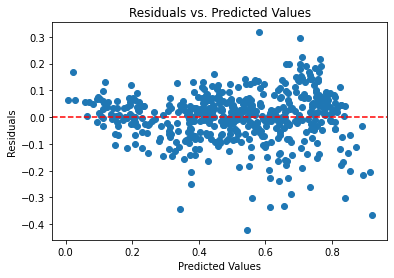

In [51]:
import matplotlib.pyplot as plt

# Residuals
residuals = y_train - y_train_pred

# Scatter plot of residuals vs. predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_train_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


Making Predictions on the test set and evaluations on the test set

In [52]:
scaler=MinMaxScaler()

num_vars=['temp','atemp','hum','windspeed','cnt']

#fit on the data
df_test[num_vars]=scaler.fit_transform(df_test[num_vars])

df_test.head()


,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_label_Spring,season_label_Summer,season_label_Winter,weathersit_label_Cloudy,weathersit_label_Light Rain
184,0,7,1,1,0,0.838710,0.783784,0.527778,0.153846,0.704300,0,0,0,1,0
535,1,6,0,3,1,0.935484,0.864865,0.472222,0.230769,0.725421,0,1,0,0,0
299,0,10,0,4,1,0.516129,0.486486,0.777778,0.461538,0.278853,0,0,1,1,0
221,0,8,0,3,1,0.903226,0.810811,0.236111,0.461538,0.545512,0,0,0,0,0
152,0,6,0,4,1,0.838710,0.756757,0.069444,0.692308,0.569148,0,1,0,0,0


In [53]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_label_Spring,season_label_Summer,season_label_Winter,weathersit_label_Cloudy,weathersit_label_Light Rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,6.490909,0.036364,3.013636,0.700000,0.557331,0.534398,0.506439,0.426923,0.517923,0.254545,0.263636,0.236364,0.318182,0.027273
std,0.500809,3.422316,0.187620,1.985057,0.459303,0.247770,0.224054,0.200292,0.190664,0.239498,0.436599,0.441609,0.425817,0.466833,0.163248
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,0.354839,0.351351,0.357639,0.307692,0.361045,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,0.000000,3.000000,1.000000,0.548387,0.540541,0.486111,0.423077,0.520681,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.000000,0.000000,5.000000,1.000000,0.774194,0.729730,0.652778,0.538462,0.687956,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
y_test=df_test.pop('cnt')

In [55]:
x_test=df_test

In [56]:
#add a constant
x_test_sm=sm.add_constant(x_test)
x_test_sm.head()

,const,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,season_label_Spring,season_label_Summer,season_label_Winter,weathersit_label_Cloudy,weathersit_label_Light Rain
184,1.0,0,7,1,1,0,0.838710,0.783784,0.527778,0.153846,0,0,0,1,0
535,1.0,1,6,0,3,1,0.935484,0.864865,0.472222,0.230769,0,1,0,0,0
299,1.0,0,10,0,4,1,0.516129,0.486486,0.777778,0.461538,0,0,1,1,0
221,1.0,0,8,0,3,1,0.903226,0.810811,0.236111,0.461538,0,0,0,0,0
152,1.0,0,6,0,4,1,0.838710,0.756757,0.069444,0.692308,0,1,0,0,0


In [57]:
x_test_sm=x_test_sm.drop(['mnth','atemp','weathersit_label_Cloudy'],axis=1)

In [58]:
y_test_pred =lr_model.predict(x_test_sm)

In [59]:
#evaluate the model
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7940948264303693